#Getting started right away -- First Install



This will ask to restart session, if that's not the case, go to runtime tab and restart the session so can use the package. This can be done on your local computer too if have python installed, I like Colab because can be useful when running a lot of data as can run multiple instances of the script. At the end the script can also organize that data which I will show later.


Can also run this directly in python by using the main.py script, if you do this, its probably easier to use a JSON to indicate the inputs to the analysis function I have a json file example there, this takes the same inputs, as path and an optional output path, and start and end indices, but pip installing is proably the easiest. Can do this that I showed here on your local environment. Just don't use the **!** before pip

In [1]:
!pip install saxs-assistant

#Preparing an Input sheet

SAXS Assistant requires a dataframe (Excel sheet) that has the path to the directory where each file is under the "path" column. The file name also is needed, which should be listed under the "file name" column as well as the angular unit "1/A" or "1/nm". If you have a pre-existing excel sheet with these can use that, just make sure that the column names match. The order at which these appear will be the order at which the script will solve the files, and plot the summary plots. Therefore if you want to see certain samples next to each other organize it in that manner. Here we are going to assume that we don't have that dataframe and don't care for the order. In that case the script can prepare this for us using the prepare_dataframe() function. For this you just need to indicate the directory (Folder) where your .dat profiles are. If haven't done yet, connect your Google drive and upload the folder with profiles. Its useful to make folder for each analysis, then upload the folder with profiles there. --- If doing this, your files should all have the same angular units or you will need to go back and manually correct as this asks for the angular unit assuming they all are in the same units.

The folder must only have SAXS profiles or will cause an error when trying plot in the later stages.The Excel sheet won't be affect but will have an entry not belonging to a profile. No need to truncate prior, the script will only look at q<0.25 A



In [2]:
from saxs_assistant.runner import prepare_dataframe
#Here this is a folder where I uploaded a folder having profiles, I am passing the path to the profiles folder
df = prepare_dataframe(folder_path='/content/drive/MyDrive/pip test/DCR 273  results/DCR 273 Nov 2024', angular_unit='1/A') #This results in no print
prepare_dataframe(folder_path='/content/drive/MyDrive/pip test/DCR 273  results/DCR 273 Nov 2024',angular_unit='1/A') #If not assign to varibale will print out
#Either way, both save it to the same folder where the profiles folder is
df.head()

folder_path before parsing: /content/drive/MyDrive/pip test/DCR 273  results/DCR 273 Nov 2024
Saved cleaned dataframe to: /content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx
folder_path before parsing: /content/drive/MyDrive/pip test/DCR 273  results/DCR 273 Nov 2024
Saved cleaned dataframe to: /content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx


,file name,path,Angular unit
0,Chris_bIgG_Ace_C120_s.dat,/content/drive/MyDrive/pip test/DCR 273 resul...,1/A
1,Chris_bIgG_Ace_C20_s.dat,/content/drive/MyDrive/pip test/DCR 273 resul...,1/A
2,Chris_bIgG_Ace_C40_a.dat,/content/drive/MyDrive/pip test/DCR 273 resul...,1/A
3,Chris_bIgG_Ace_C60_a.dat,/content/drive/MyDrive/pip test/DCR 273 resul...,1/A
4,Chris_bIgG_F1_C10_s.dat,/content/drive/MyDrive/pip test/DCR 273 resul...,1/A


This will then save the input dataframe to the same directory where the profiles folder is, this is also printed out. Now that we have an input dataframe, we can pass this to the script and this will start analysing. It takes about a minute to start, after that it stabilizes and the estimated time to completion becomes more accurate. The fastest and simplest way is to just run analyze_and_plot_all() This function will generate the Excel with results, the summary plots for both the solved and unsolved files, as well as extract the plotting data, into a new folder called "return" which will be added to the same folder where the profiles are. You can copy the path that was printed or go to your directory navigator on the left if using Google colab and copy the path and pass it to the function

This function can also take the following inputs
***start_index:*** The row of dataframe to start analyzing from
***end_index:*** The row of the dataframe to stop analyzing.
***music:*** (default is False) This is only available if running in your local computer and do the music package installation, but can have the script play some instrumental while your data is being analyzed and it'll stop when done for some light entertainment. The script will beep when complete regardless

Here I'm choosing a range of files that have some flagged files so can see output, bit slow here with this dataset. This will print out the name so can know in the moment, but also in the results excel these will have empty rows or have entries in the "Fatal Error" column. The time to completion depends on the data, for very well behaved datasets, this can go through a file in ~ 20 seconds.

For every file that errors the progress bar will split and start a new counter, so can keep track of the files that didn't get analyzed. This also prints out a reason, which could be from the start the PDDF-Informed found nothing, but hopefully Auto Guinier will, in this case you'll get the "No Guinier fits found" , another arrow that you may see if "Final Rg selection failed" or PR that agrees could be found, meaning can't validate w PDDF so gets flagged

In [1]:
from saxs_assistant.runner import analyze_and_plot_all
_= analyze_and_plot_all('/content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx',start_index = 4, end_index =20)

 Analyzing: /content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx
Using input file: /content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx
Saving results to: /content/drive/MyDrive/pip test/DCR 273  results/return
Start Time: 2025-06-30 00:52:03


Running SAXS Analysis: 100%|██████████| 16/16 [16:37<00:00, 62.35s/it]


End Time: 2025-06-30 01:08:41
Total Execution Time: 997.58 seconds


<IPython.core.display.Javascript object>

 Generating plots from: /content/drive/MyDrive/pip test/DCR 273  results/return/plot_data.joblib
Saved PDF summary to /content/drive/MyDrive/pip test/DCR 273  results/return/solved_summary.pdf
Saved flagged PDF summary to /content/drive/MyDrive/pip test/DCR 273  results/return/flagged_summary.pdf
Now extracting the raw graph data for each plot in the "plot_data" dict


<IPython.core.display.Javascript object>


✅ Analysis complete! Results and plots saved to:
/content/drive/MyDrive/pip test/DCR 273  results/return


This is how the directory looked before I ran the code above

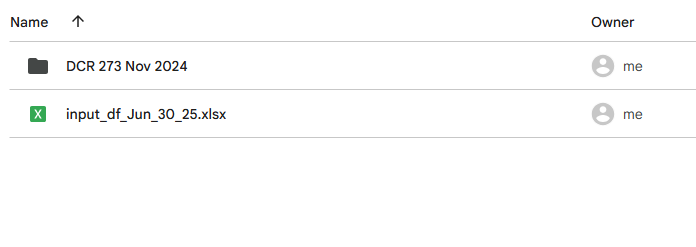

After running, there will now be a folder called return, in this you will have **an Excel sheet** that has all the results. See the folder where this tutorial is stored so can see what each means, as there is quite a bit and most likely one will just be interested in a handful of these, but decided to keep them just in case useful for someone. The will also be **2 PDFs** (or 1 if all data wasn't analyzed or if all was analyzed). One called solved_summary.pdf and the other falgged_summary.pdf, the flagged one could be useful as if no Guinier region is the issue, this could give you an idea of that. The solved_summary has more informative plots, and the ML predictions for Dmax as well as structural classification with GMM (this is all in the Excel sheet too). There will also be a **.joblib dictionary called plot_data.joblib**, keep it there as the script will use this if you want to replot your data later on. Lastly, there will also be** a new folder added by the script called plots** In the folder there is the raw plotting data to recreate all the plots in the summary pdf, (except for the probabilities these are in the Excel)

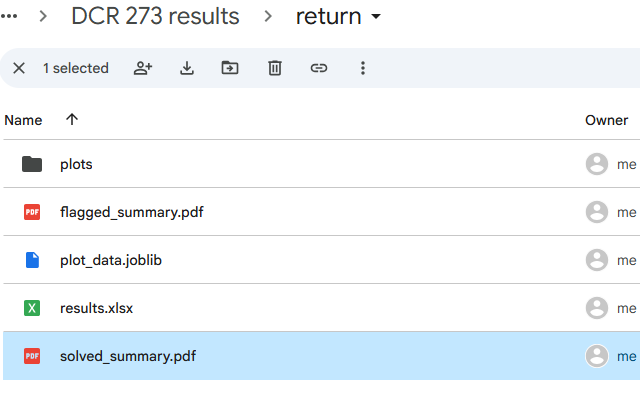

# Running Multiple Sessions and Organizing

As ya'll saw earlier I solved part of the data, and this dataset was a bit slow, so what you can do is run the script on multiple Colab sessions and tell the script to solve individual portions of a dataset. This won't overwrite data, as if there is a return folder there already the script will then save to return_1 and so on increasing by 1. At the end you can organize them all. I will run a few of these now so can show how to combine. At first the script will say its going to save to the return folder as it checks right before saving, as if running in multiple sessions these might finish at different times. Idealy these will finish in order so the dataframe is in oder. This will only work if you don't rename folders or files, and keep them in the way the script outputs them, which might be useful to have a folder for each dataset being solved.----- This run will save in a folder called return_1 as there was already a returns folder.

In [2]:
from saxs_assistant.runner import analyze_and_plot_all
_= analyze_and_plot_all('/content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx',start_index = 20)

 Analyzing: /content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx
Using input file: /content/drive/MyDrive/pip test/DCR 273  results/input_df_Jun_30_25.xlsx
Saving results to: /content/drive/MyDrive/pip test/DCR 273  results/return
Start Time: 2025-06-30 01:24:46


Running SAXS Analysis: 100%|██████████| 18/18 [16:45<00:00, 55.85s/it]


End Time: 2025-06-30 01:41:31
Total Execution Time: 1005.24 seconds


<IPython.core.display.Javascript object>

 Generating plots from: /content/drive/MyDrive/pip test/DCR 273  results/return_1/plot_data.joblib
Saved PDF summary to /content/drive/MyDrive/pip test/DCR 273  results/return_1/solved_summary.pdf
Saved flagged PDF summary to /content/drive/MyDrive/pip test/DCR 273  results/return_1/flagged_summary.pdf
Now extracting the raw graph data for each plot in the "plot_data" dict


<IPython.core.display.Javascript object>


✅ Analysis complete! Results and plots saved to:
/content/drive/MyDrive/pip test/DCR 273  results/return_1


Now our folder has these two returns with files having the same name. If after analyzing want to combine them to have them all in one place we can use the combine_sessions() function and we just pass the main analysis directory where these files are. This also has an optional output_name argument, which can be given if want this to be named something in paticular. The function will then also combine the dictionaries, which can be useful for if want to genrate a PDF summary report that has all your data, even if ran on different sessions. The return folders will then be moved into a new folder called partials, and the main folder will have the final results, and the plot_data dictionary that has everything combined.
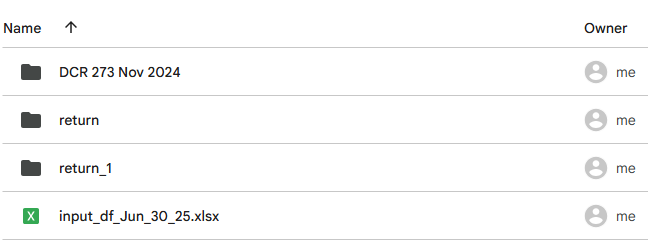

In [5]:
from saxs_assistant.organizer import combine_sessions
combine_sessions('/content/drive/MyDrive/pip test/DCR 273  results')

Combined results saved as 'final_results.xlsx' and 'final_results_Plots.joblib' in /content/drive/MyDrive/pip test/DCR 273  results
Original folders moved to '/content/drive/MyDrive/pip test/DCR 273  results/partials'


Now in the main folder w just have our compiled results Excel, and the dictionary. The individual PDFs and partial results are in the partials folder now, within their corresponding return folder

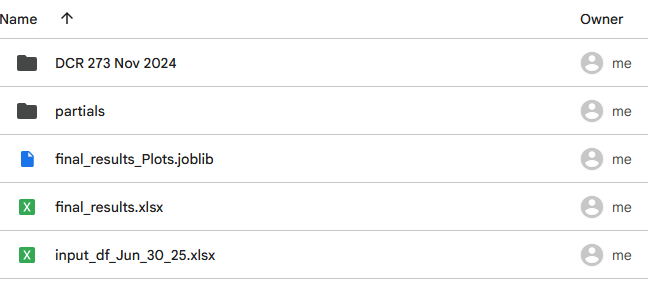

# Individual Functions


You might not always want to generate the PDFs if have a lot of data as this can take awhile, in that case can use individual functions like analyze_and_save() which takes the same inputs, but won't plot-- remeber to all these functions can provide an output_dir path to indicate where you want to save your data.

In [ ]:
from saxs_assistant.runner import analyze_and_save
#and all these take the start_index, and end_index arguments optional if want to analyze portions
analyze_and_save('/content/drive/MyDrive/pip test/DCR 273  results')

Then whenever you want to plot or if want to plot the dictionary with all the combined data can use the plot_solved_summary() or plot_flagged() this way keep the unsolved and solved files in separate PDFs.  **If ever need to revisit this tutorial again, or want to use this notebook just do !pip intall saxs-assistant followed by saxs_assistant.show_tutorial() which will show the PDF version of this --- to use this, notebook, look through the excel sheet that says what each out put in the Excel sheet is call saxs_assistant.show_supplemental() this will open a link that has supplemental data, this notebook which you can download and use. Hope this is helpful, don't forget to alway check your results : )  Have a nice day !

In [ ]:
from saxs_assistant.plotting import plot_solved_summary, plot_flagged
plot_solved_summary('/content/drive/MyDrive/pip test/prev test low qual/return/plot_data.joblib')
plot_flagged('/content/drive/MyDrive/pip test/prev test low qual/return/plot_data.joblib')

In [ ]:
saxs_assistant.show_tutorial()

saxs_assistant.show_supplemental()